<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Selecting-Reptilia-samples" data-toc-modified-id="Selecting-Reptilia-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Reptilia samples</a></span><ul class="toc-item"><li><span><a href="#summary" data-toc-modified-id="summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>summary</a></span></li></ul></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>COG functional categories</a></span><ul class="toc-item"><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-6.3.1.1"><span class="toc-item-num">6.3.1.1&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-Taxonomy" data-toc-modified-id="By-Taxonomy-6.4.1.1"><span class="toc-item-num">6.4.1.1&nbsp;&nbsp;</span>By Taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Metagenome assembly of Repilia samples
  * assemblying genes by using `plass`

# Var

In [2]:
work_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_rep/LLMGAG/'

samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgag/'


# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

# Selecting Reptilia samples

In [15]:
meta = read.delim(metadata_file, sep='\t') %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name, diet, habitat)
meta %>% dfhead

[1] 475   8


SampleID,class,order,family,genus,scientific_name,diet,habitat
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,aquatic habitat
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat
F36_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat


In [16]:
samps = read.delim(samples_file, sep='\t') %>%
    mutate(Sample = gsub('^XF', 'F', Sample))
samps %>% dfhead

[1] 291   6


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510


In [17]:
setdiff(samps$Sample, meta$Sample)

[1] "unassigned"

In [18]:
# joining
samps = samps %>%
    inner_join(meta, c('Sample'='SampleID')) 

samps %>% dfhead

Warning message:
“Column `Sample`/`SampleID` joining character vector and factor, coercing into character vector”

[1] 290  13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854,Mammalia,Artiodactyla,Bovidae,Bos,Bos_taurus,herbivore,terrestrial habitat
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta_africana,herbivore,terrestrial habitat
X80_European_Otter,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X80_European_Otter/R2_final.fq.gz,1100413,0.3194258,20.45510,Mammalia,Carnivora,Mustelidae,Lutra,Lutra_lutra,carnivore,terrestrial habitat


In [19]:
# all metadata 
samps %>%
    group_by(class) %>%
    summarize(n = n()) %>%
    ungroup()

class,n
Actinopterygii,27
Amphibia,8
Aves,63
Mammalia,179
Reptilia,13


In [20]:
samps_f = samps %>%
    filter(class == 'Reptilia') 

samps_f %>% dfhead

[1] 13 13


Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity,class,order,family,genus,scientific_name,diet,habitat
X343_Sand_Lizard,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X343_Sand_Lizard/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X343_Sand_Lizard/R2_final.fq.gz,2705803,0.4310567,20.31664,Reptilia,Squamata,Lacertidae,Lacerta,Lacerta_agilis,carnivore,terrestrial habitat
X242_Dalmatian_Tortoise,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X242_Dalmatian_Tortoise/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X242_Dalmatian_Tortoise/R2_final.fq.gz,3109534,0.4496682,20.06664,Reptilia,Squamata,Testudinidae,Testudo,Testudo_hermanni,omnivore,terrestrial habitat
X405_Nile_Crocodile,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X405_Nile_Crocodile/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X405_Nile_Crocodile/R2_final.fq.gz,2896720,0.4584598,19.96158,Reptilia,Crocodilia,Crocodylidae,Crocodylus,Crocodylus_niloticus,carnivore,terrestrial habitat


In [21]:
outF = file.path(work_dir, 'samples_rep.tsv')
samps_f %>%
    arrange(class, order, family, genus) %>%
    write.table(outF, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_rep/LLMGAG//samples_rep.tsv 


## summary

In [22]:
samps_f$Total.Sequences %>% summary

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  671779  1630153  2705803  3205944  3206641 11726859 

# LLMGAG 

In [23]:
F = file.path(work_dir, 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_rep/LLMGAG/samples_rep.tsv

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_rep/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/eggnog.db
eggnog_og2lev_db: /ebio/abt3_projects/databases_no-backup/Eggnog/og2level.tsv.gz
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_di

## Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgag/
$ screen -L -S llmgag-ga-rep ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_rep/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/MG_assembly_rep/LLMGAG/SGE_log 20
```

In [5]:
pipelineInfo(pipeline_dir)

LLMGAG

Ley Lab Metagenome Assembly of Genes (LLMGAG)

* Version: 0.1.3
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/annotate.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- pigz
- bioconda::fasta-splitter
- bioconda::eggnog-mapper

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/checkm.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/das_tool.yaml <==
channels: !!python/tuple
- r
- bioconda
dependencies:
- pigz
- ruby
- r::r-base
- r::r-data.table
- r::r-domc
- r::r-ggplot2
- bioconda::pullseq
- bioconda::prodigal
- bioconda::blast
- bioconda::diamond
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/dask.yaml <==
channels: !!python/tuple
- co

# Summary

## Number of genes assembled & clustered

In [6]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 10866795 


In [7]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 5965461 


In [8]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 662667 


## Taxonomy

In [10]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

Warning message:
“Expected 7 pieces. Additional pieces discarded in 167476 rows [103, 110, 122, 134, 152, 157, 160, 225, 228, 229, 325, 345, 349, 352, 431, 432, 433, 438, 501, 503, ...].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 2392461 rows [2, 4, 6, 8, 9, 18, 22, 24, 27, 28, 29, 30, 31, 34, 35, 36, 37, 39, 40, 41, ...].”

[1] 5965461      11


seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
7e81ce1fd905490ea7f67bb36d616bff,522484,no rank,Campylobacter avium LMG 24591,unknown,Proteobacteria,Epsilonproteobacteria,Campylobacterales,Campylobacteraceae,Campylobacter,Campylobacter avium
46c1320c63ba4d75a79f0ed4f59344d1,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
88af802ff91a49e7a2aec42cdf97ed5b,2067550,species,Clostridium sp. chh4-2,unknown,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium,Clostridium sp. chh4-2


In [11]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 5965461


In [12]:
# which ranks found?
tax$rank %>% table %>% print

.
           class           cohort           family            forma 
            9434              105             4986               16 
           genus       infraclass       infraorder          kingdom 
            7304              435                9              230 
         no rank            order        parvorder           phylum 
         3208362             5431               15             5710 
         species    species group species subgroup         subclass 
         2652505              381               93              114 
       subfamily         subgenus       subkingdom         suborder 
              88               13               17              137 
       subphylum       subspecies       superclass      superfamily 
              47            63122               89               52 
    superkingdom       superorder            tribe         varietas 
            6406              145                3              212 


In [13]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [14]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 199   3


Domain,Phylum,n
Fungi,Ascomycota,64361
Fungi,Basidiomycota,1092
Fungi,Blastocladiomycota,5


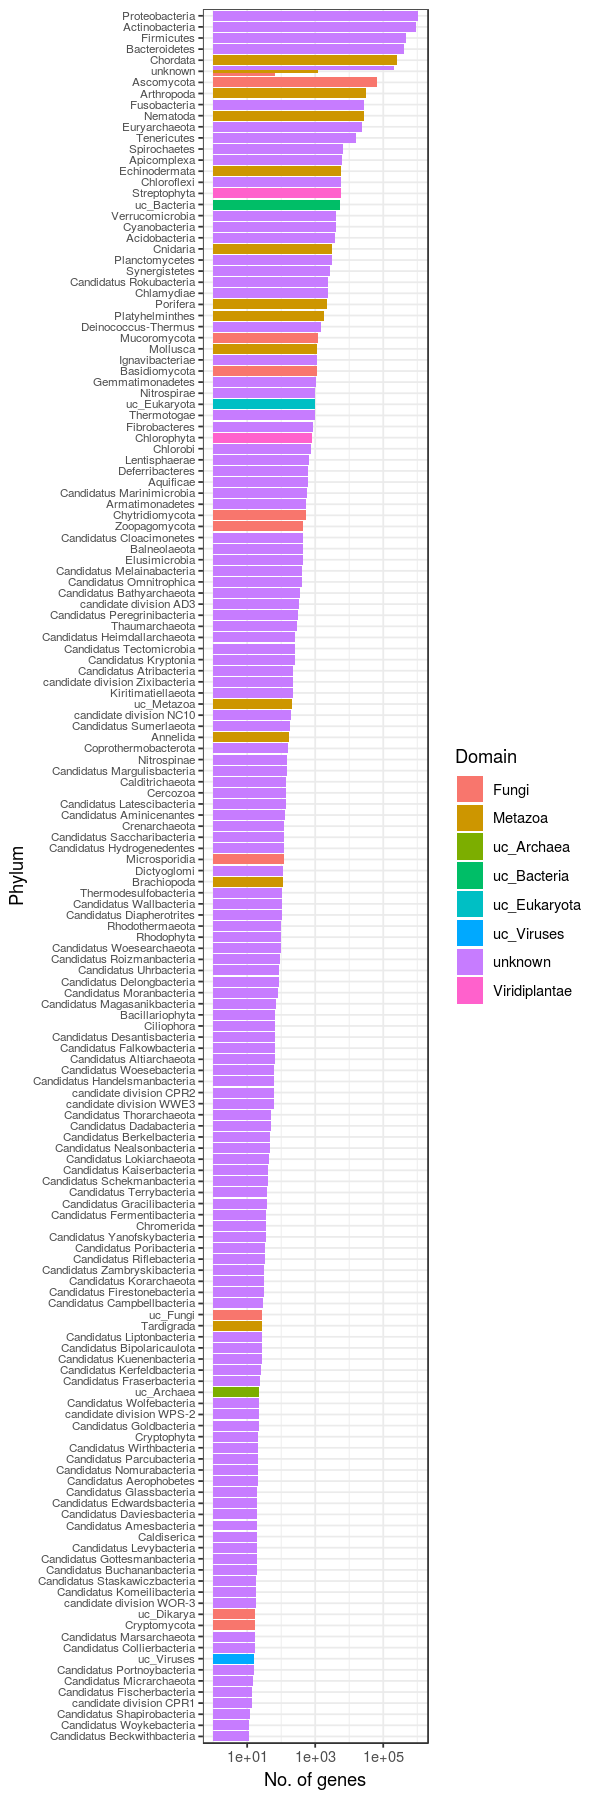

In [15]:
# plotting by phylum
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,15)
plot(p)

In [16]:
# top phyla
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
unknown,Proteobacteria,1040377
unknown,Actinobacteria,922795
unknown,Firmicutes,458537
unknown,Bacteroidetes,408257
Metazoa,Chordata,249689
unknown,unknown,209828
Fungi,Ascomycota,64361
Metazoa,Arthropoda,31541
unknown,Fusobacteria,26808
Metazoa,Nematoda,26720


In [17]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 400   4


Domain,Phylum,Class,n
Fungi,Ascomycota,Arthoniomycetes,24
Fungi,Ascomycota,Dothideomycetes,3724
Fungi,Ascomycota,Eurotiomycetes,20045


In [18]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
unknown,Actinobacteria,Actinobacteria,900019
unknown,Proteobacteria,Gammaproteobacteria,835863
unknown,Bacteroidetes,Bacteroidia,333030
unknown,Firmicutes,Clostridia,278974
unknown,unknown,unknown,208887
Metazoa,Chordata,unknown,188739
unknown,Firmicutes,Bacilli,105442
unknown,Proteobacteria,Betaproteobacteria,95270
unknown,Proteobacteria,Alphaproteobacteria,58019
Fungi,Ascomycota,Sordariomycetes,37918


## Annotations

In [19]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') %>%
  dplyr::select(-V6)
emap_annot %>% dfhead

[1] 3360373      12


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13
421ef3ce70494abb8855d3012d76e808,13735.ENSPSIP00000001544,8.5e-19,97.8,,,,euNOG[57],"0Y65V@NOG,KOG1075@euNOG",NA|NA|NA,S,Retrotransposon protein
6a9ce35dc5c542e4935859a140c907a4,706433.HMPREF9430_01590,1.3e-72,278.1,LEVG,"K02796,K19509",,bactNOG[38],"05F3R@bactNOG,0I734@eryNOG,0NDZ8@firmNOG,COG3716@NOG",NA|NA|NA,G,PTS system mannose fructose sorbose family IID component
ff48c7935d444b3da53297ef779bff36,714961.BFZC1_05298,7.1e-29,131.7,YTXG,,,bactNOG[38],"04VY7@bacNOG,05MQN@bactNOG,0NMQC@firmNOG,COG4768@NOG",NA|NA|NA,S,General stress protein


In [20]:
# adding taxonomy info
intersect(emap_annot$V1, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('V1'='seqID'))

emap_annot %>% dfhead

[1] 3360373
[1] 3360373      22


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
421ef3ce70494abb8855d3012d76e808,13735.ENSPSIP00000001544,8.5e-19,97.8,,,,euNOG[57],"0Y65V@NOG,KOG1075@euNOG",NA|NA|NA,⋯,8469,species,Chelonia mydas,Metazoa,Chordata,unknown,Testudines,Cheloniidae,Chelonia,Chelonia mydas
6a9ce35dc5c542e4935859a140c907a4,706433.HMPREF9430_01590,1.3e-72,278.1,LEVG,"K02796,K19509",,bactNOG[38],"05F3R@bactNOG,0I734@eryNOG,0NDZ8@firmNOG,COG3716@NOG",NA|NA|NA,⋯,706433,no rank,Solobacterium moorei F0204,unknown,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Solobacterium,Solobacterium moorei
ff48c7935d444b3da53297ef779bff36,714961.BFZC1_05298,7.1e-29,131.7,YTXG,,,bactNOG[38],"04VY7@bacNOG,05MQN@bactNOG,0NMQC@firmNOG,COG4768@NOG",NA|NA|NA,⋯,1478,species,Bacillus simplex,unknown,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus simplex


In [21]:
n_annot_seqs = emap_annot$V1 %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 3360373 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [22]:
# summarizing by functional group
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 3360373 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 3206665       2


V1,COG_func_cat
421ef3ce70494abb8855d3012d76e808,S
6a9ce35dc5c542e4935859a140c907a4,G
ff48c7935d444b3da53297ef779bff36,S


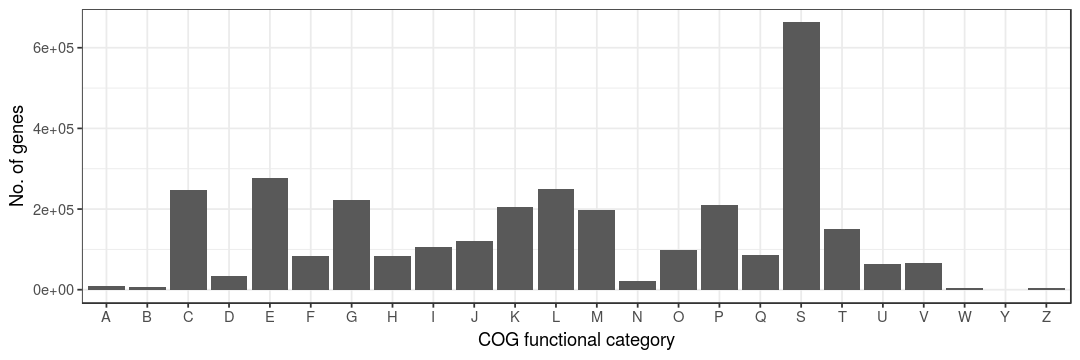

In [23]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

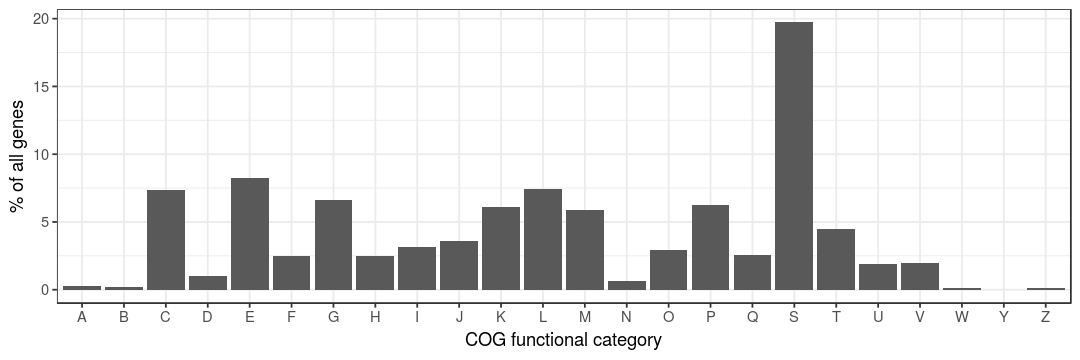

In [24]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

#### Grouped by taxonomy

In [25]:
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1) %>%
    left_join(tax, c('V1'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 3360373 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 3206665      12


V1,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
421ef3ce70494abb8855d3012d76e808,S,8469,species,Chelonia mydas,Metazoa,Chordata,unknown,Testudines,Cheloniidae,Chelonia,Chelonia mydas
6a9ce35dc5c542e4935859a140c907a4,G,706433,no rank,Solobacterium moorei F0204,unknown,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Solobacterium,Solobacterium moorei
ff48c7935d444b3da53297ef779bff36,S,1478,species,Bacillus simplex,unknown,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,Bacillus simplex


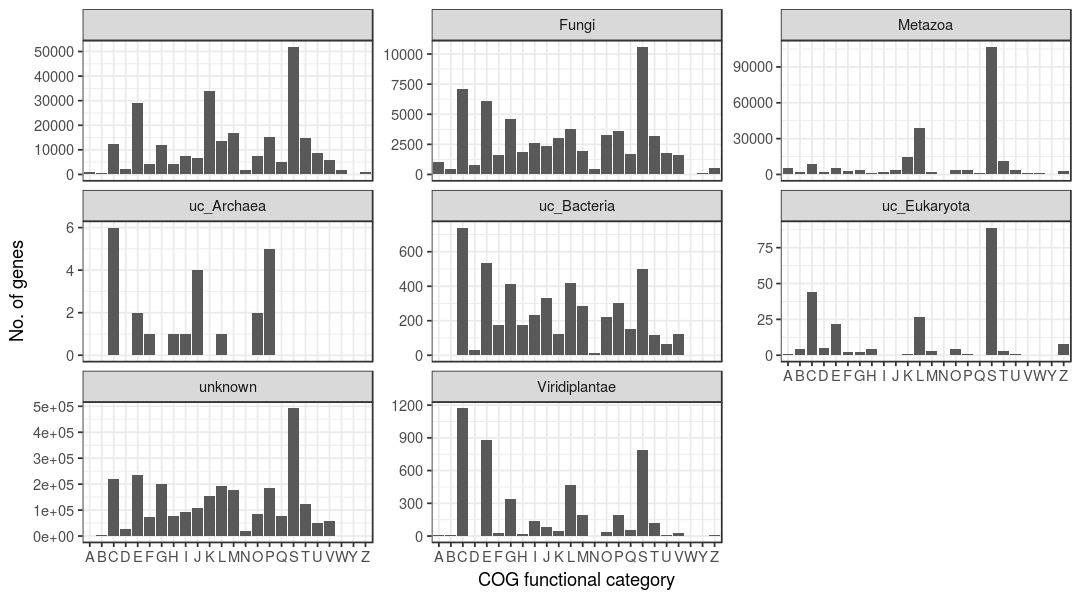

In [26]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

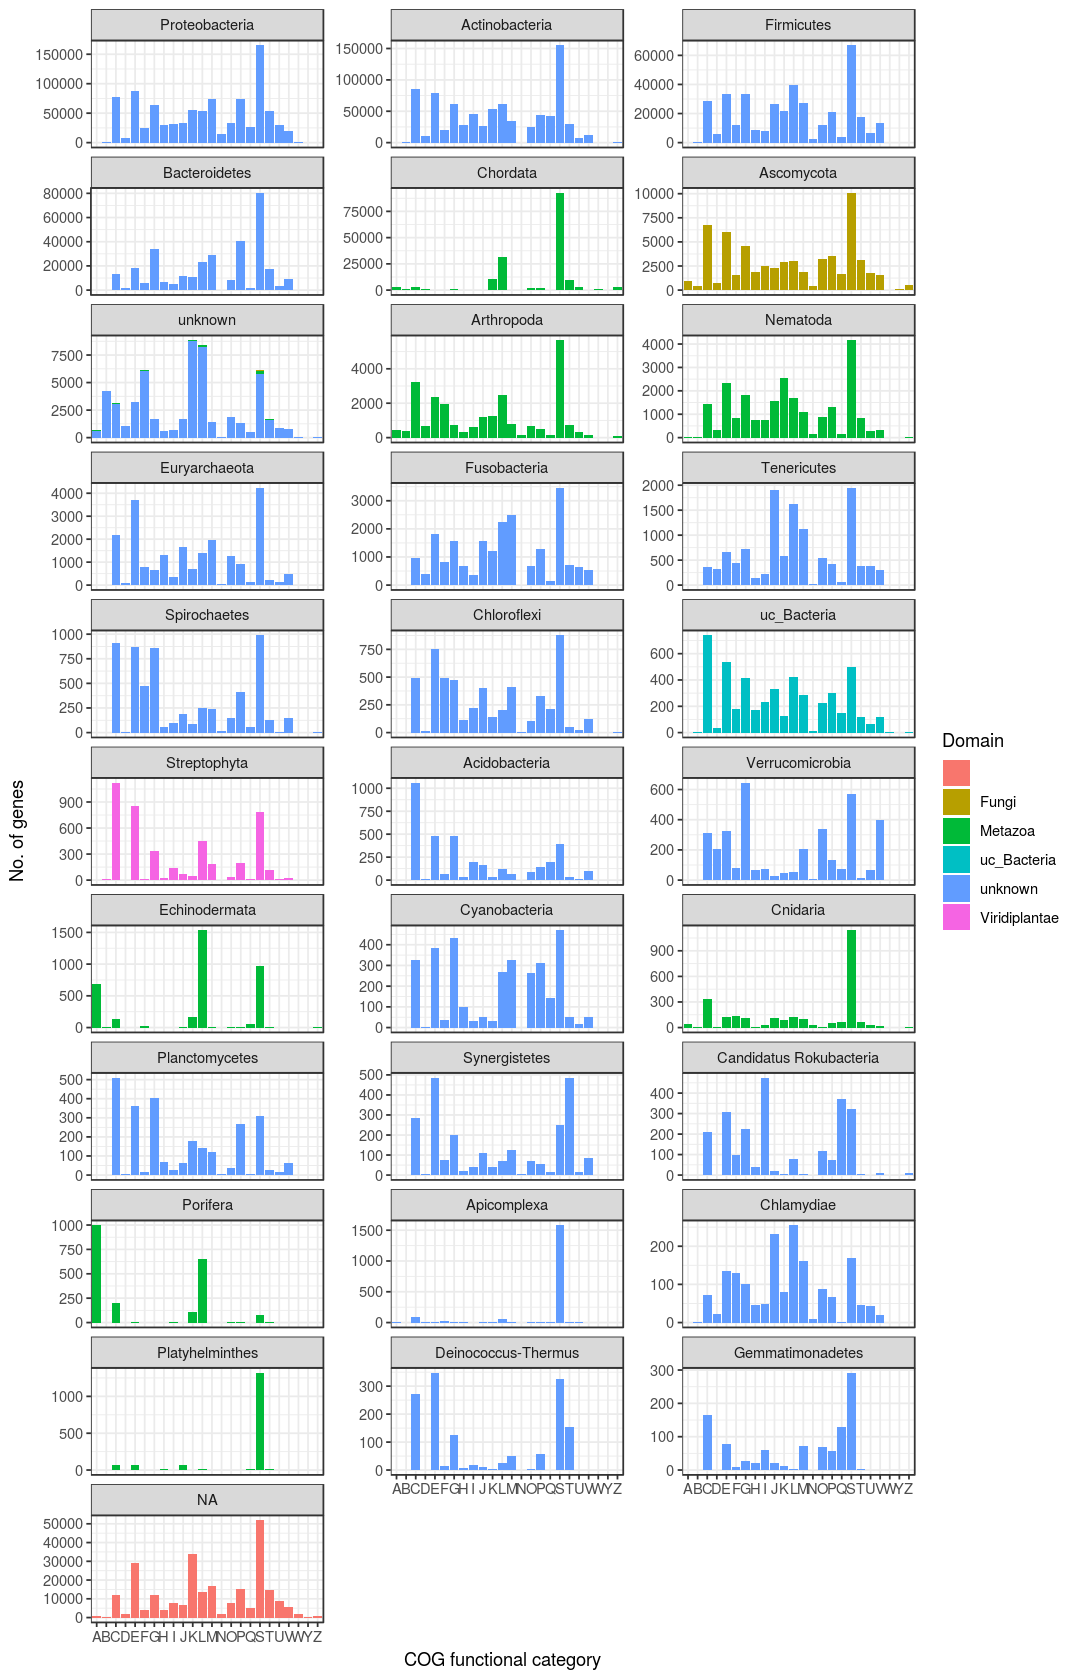

In [27]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,14)
plot(p)

## humann2 db genes

In [28]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 45749 rows [14, 15, 97, 98, 103, 104, 115, 124, 132, 171, 173, 179, 181, 193, 194, 216, 220, 238, 250, 255, ...].”

[1] 662667      6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
3007cd8a48a746e5930871df498fbe80,UniRef50_D9I7M9,66,Escherichia,Escherichia_coli,1268995
996405a13e964578a4f97ac805de1f9b,UniRef50_K5ZEM5,122,Bacteroides,Bacteroides_uniformis,411479
ea84402e25e7480d930f7c6979c8eeb5,UniRef50_J8VGP8,182,Halomonas,Halomonas_sp_A3H3,1346287


In [29]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 662667
[1] 662667     16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
3007cd8a48a746e5930871df498fbe80,UniRef50_D9I7M9,66,Escherichia,Escherichia_coli,1268995,1268995,no rank,Escherichia coli 908525,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli
996405a13e964578a4f97ac805de1f9b,UniRef50_K5ZEM5,122,Bacteroides,Bacteroides_uniformis,411479,411479,no rank,Bacteroides uniformis ATCC 8492,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides uniformis
ea84402e25e7480d930f7c6979c8eeb5,UniRef50_J8VGP8,182,Halomonas,Halomonas_sp_A3H3,1346287,1346287,species,Halomonas sp. A3H3,unknown,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Halomonas,Halomonas sp. A3H3


### Summary

In [30]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 201756

In [31]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_G3URB3,814
UniRef50_U3HZS9,566
UniRef50_W5NLK6,498
UniRef50_R4GAQ7,487
UniRef50_F4X0S8,427
UniRef50_K7EZQ4,415
UniRef50_K7EY34,371
UniRef50_I1EQT3,331
UniRef50_K7F130,331
UniRef50_R4GB20,293


In [32]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 616918

#### By Taxonomy

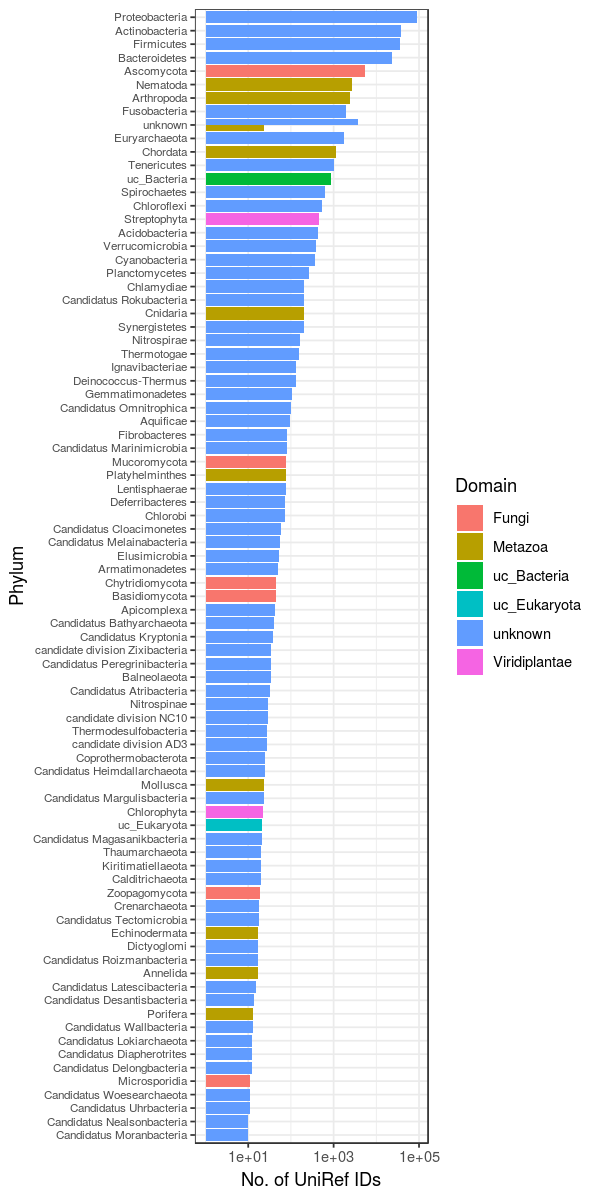

In [33]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,10)
plot(p)

# sessionInfo

In [34]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec